(53.05, 5838.515)

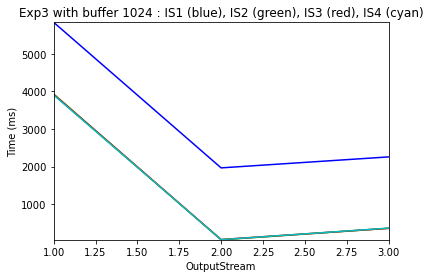

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

SOURCE_FILE = "graphOutput.txt"


"""
Format :

title
axis1,axis2
#
Courbe1
x1,y1
x2,y2
...
#
Courbe2
x1,y1
x2,y2
...
"""

listOfColorsIDs = ['b','g','r','c','m','y','k']
listOfLineStylesIDs = ['-', '--', '-.', ':']
listOfColorsNames = ["blue", "green", "red", "cyan", "magenta", "yellow", "black"]

def getInfos(inputFile):
    f = open(inputFile)
    lines = f.read().splitlines()
    f.close()
    #First line gives the title
    title = lines[0]
    #Second line gives the name of the axis : "name1,name2"
    axis = lines[1].split(',')
    
    #Marker to say it starts "#"
    if (lines[2] != "#"):
        print("Error in format")
    resultInfos = []
    lineNames = []
    length = len(lines)
    
    #Then we have the name of the line : "Curve 1"
    lineIndex = 3
    lineNames.append(lines[lineIndex])
    lineIndex += 1
    
    while (lineIndex < length):
        setOfPoints = []
        while (lines[lineIndex] != "#"):
            if (lineIndex >= length):
                break
            infoLine = lines[lineIndex].split(',')
            if (len(infoLine) == 0):
                lineIndex += 1
                continue
            xInfo = float(infoLine[0])
            yInfo = float(infoLine[1])
            point = (xInfo, yInfo)
            setOfPoints.append(point)
            lineIndex += 1
            if (lineIndex >= length):
                break
        resultInfos.append(setOfPoints)
        lineIndex += 1
        if (lineIndex >= length):
                break
        lineNames.append(lines[lineIndex])
        lineIndex += 1
    return lineNames, resultInfos, axis, title
    
def sortPoints(tuplesList, index):
    for i in range(len(tuplesList)-1, 1, -1):
        for j in range(i-1):
            if (tuplesList[j+1][index] < tuplesList[j][index]):
                temp = tuplesList[j+1]
                tuplesList[j+1] = tuplesList[j]
                tuplesList[j] = temp

names, lines, axis, title = getInfos(SOURCE_FILE)

title += ' :'
n = len(names)
counter = 0
hasToUseLineStyles = False
if (n > len(listOfColorsIDs)):
    hasToUseLineStyles = True
isFirst = True
for i in range(len(listOfLineStylesIDs)):
    if (counter >= n):
        break
    for j in range(len(listOfColorsIDs)):
        if (counter >= n):
            break
        if (not isFirst):
            title += ","
        title += " "+names[counter]+ " ("+listOfColorsNames[j]
        if (hasToUseLineStyles):
            title+=listOfLineStylesIDs[i]
        title += ")"
        isFirst = False
        counter += 1

for i in range(len(lines)):
    sortPoints(lines[i], 0)


plt.figure()
plt.title(title)
plt.xlabel(axis[0])
plt.ylabel(axis[1])



colorIndex = 0
styleIndex = 0
maxX = 0
maxY = 0
minX = float('inf')
minY = float('inf')

for i in range(len(lines)):
    line = lines[i]
    xPoints = []
    yPoints = []
    for j in range(len(line)):
        xPoints.append(line[j][0])
        yPoints.append(line[j][1])
        if (line[j][0] > maxX):
            maxX = line[j][0]
        if (line[j][0] < minX):
            minX = line[j][0]
        if (line[j][1] > maxY):
            maxY = line[j][1]
        if (line[j][1] < minY):
            minY = line[j][1]
    style = listOfColorsIDs[colorIndex]+listOfLineStylesIDs[styleIndex]
    plt.plot(xPoints, yPoints, style)
    colorIndex += 1
    if (colorIndex >= len(listOfColorsIDs)):
        colorIndex = 0
        styleIndex += 1


plt.xlim(minX,maxX)
plt.ylim(minY,maxY)
